In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------Split Train and Test Data----------
from sklearn.model_selection import train_test_split

# -----Classification ML Algorithms--------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.svm import SVC 

from sklearn.neighbors import KNeighborsClassifier

# ----------HyperParameter Tuning --------------
from sklearn.model_selection import GridSearchCV

# ---------Evaluating Performance Metrics-------
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# ---------SMOTE for OvrSampling----------------
from imblearn.over_sampling import SMOTE

# --------Supress Future Warning----------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/AfterDataCleaning.csv')

In [3]:
df.head()

,year,customer_id,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0
1,2015,100643,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0
2,2015,100756,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1
3,2015,101595,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0
4,2015,101653,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0


In [4]:
X = df.drop('churn',axis=1)
Y = df['churn']

sm = SMOTE(random_state=123)
X, Y = sm.fit_resample(X, Y.ravel())

print(f'Revised Shape of X is- {X.shape}')
print(f'Revised Shape of Y is- {Y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1234)

print(f'Shape of X_train is- {X_train.shape}')
print(f'Shape of X_test is- {X_test.shape}')
print(f'Shape of y_train is- {y_train.shape}')
print(f'Shape of y_test is- {y_test.shape}')

Revised Shape of X is- (3406, 14)
Revised Shape of Y is- (3406,)
Shape of X_train is- (2384, 14)
Shape of X_test is- (1022, 14)
Shape of y_train is- (2384,)
Shape of y_test is- (1022,)


In [5]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, X_training_data, X_test_data, Y_training_data, Y_test_data, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_training_data)
    pred_test = model.predict(X_test_data)
    
    train_acc = accuracy_score(Y_training_data, pred_train)
    test_acc = accuracy_score(Y_test_data, pred_test)
    
    train_recall = recall_score(Y_training_data,pred_train)
    test_recall = recall_score(Y_test_data,pred_test)
    
    train_precision = precision_score(Y_training_data,pred_train)
    test_precision = precision_score(Y_test_data,pred_test)
    
    train_f1 = f1_score(Y_training_data,pred_train)
    test_f1 = f1_score(Y_test_data,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(Y_training_data,pred_train))
        print("Accuracy on test set : ",accuracy_score(Y_test_data,pred_test))
        print("Recall on training set : ",recall_score(Y_training_data,pred_train))
        print("Recall on test set : ",recall_score(Y_test_data,pred_test))
        print("Precision on training set : ",precision_score(Y_training_data,pred_train))
        print("Precision on test set : ",precision_score(Y_test_data,pred_test))
        print("F1-Score on training set : ",f1_score(Y_training_data,pred_train))
        print("F1-Score on test set : ",f1_score(Y_test_data,pred_test))
    
    return score_list # returning the list with train and test scores

In [6]:
def get_summary_of_models(models):
    # defining list of models

    # defining empty lists to add train and test results
    acc_train = []
    acc_test = []
    recall_train = []
    recall_test = []
    precision_train = []
    precision_test = []
    f1_train =[]
    f1_test = []
    roc_auc_train = []
    roc_auc_test = []
    
    # looping through all the models to get the accuracy, precall and precision scores
    for idx,model in enumerate(models):
            #print(model)
            j = get_metrics_score(model,X_train, X_test, y_train, y_test,False)
            acc_train.append(np.round(j[0],2))
            acc_test.append(np.round(j[1],2))
            recall_train.append(np.round(j[2],2))
            recall_test.append(np.round(j[3],2))
            precision_train.append(np.round(j[4],2))
            precision_test.append(np.round(j[5],2))
            f1_train.append(np.round(j[6],2))
            f1_test.append(np.round(j[7],2))
    
    model_metrics = pd.DataFrame({'TrainAccuracy': acc_train, 'TestAccuracy': acc_test, 'Train_Recall':recall_train, 
                                  'TestRecall':recall_test, 'TrainPrecision':precision_train, 'TestPrecision':precision_test, 
                                  'TrainF1Score':f1_train, 'TestF1Score':f1_test
                                 })
    
    return model_metrics

In [7]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_ROC_AUC_score(model, X_training_data, X_test_data, Y_training_data, Y_test_data, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train_prob = model.predict_proba(X_training_data)
    pred_train_prob = pred_train_prob[:,1]
    train_auc = roc_auc_score(Y_training_data, pred_train_prob)
    pred_test_prob = model.predict_proba(X_test_data)
    pred_test_prob = pred_test_prob[:,1]
    test_auc = roc_auc_score(Y_test_data,pred_test_prob)

    score_list.extend((train_auc,test_auc))
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:    
        print("ROC AUC Score on training set : ",roc_auc_score(Y_training_data,pred_train_prob))
        print("ROC AUC Score on test set : ",roc_auc_score(Y_test_data,pred_test_prob))
        
    return score_list

In [8]:
def get_ROC_AUC_score_of_models(models):
    # defining list of models

    roc_auc_train = []
    roc_auc_test = []
    
    # looping through all the models to get the accuracy, precall and precision scores
    for idx,model in enumerate(models):
            #print(model)
            j = get_ROC_AUC_score(model,X_train, X_test, y_train, y_test,False)
            roc_auc_train.append(np.round(j[0],2))
            roc_auc_test.append(np.round(j[1],2))
    
    model_auc_score = pd.DataFrame({'Train ROC-AUC Score': roc_auc_train, 'Test ROC-AUC Score': roc_auc_test})
    
    return model_auc_score

## 1. Logistic Regression

In [9]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_lr_train_predicted = lr_model.predict(X_train)
y_lr_test_predicted = lr_model.predict(X_test)
metrics.accuracy_score(y_train,y_lr_train_predicted)
#Using above defined function to get accuracy, recall and precision on train and test set
lr_score=get_metrics_score(lr_model, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.6023489932885906
Accuracy on test set :  0.5929549902152642
Recall on training set :  0.6028547439126785
Recall on test set :  0.572265625
Precision on training set :  0.6018440905280805
Precision on test set :  0.5979591836734693
F1-Score on training set :  0.6023489932885906
F1-Score on test set :  0.5848303393213574


In [10]:
print('Classification Report for Training Data- \n',classification_report(y_train, y_lr_train_predicted))
print('\nClassification Report for Test Data- \n',classification_report(y_test, y_lr_test_predicted))
print('Confusion matrix for the train Data- \n',confusion_matrix(y_train, y_lr_train_predicted))
print('\nConfusion matrix for the test Data- \n',confusion_matrix(y_test, y_lr_test_predicted))

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.60      0.60      0.60      1193
           1       0.60      0.60      0.60      1191

    accuracy                           0.60      2384
   macro avg       0.60      0.60      0.60      2384
weighted avg       0.60      0.60      0.60      2384


Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.59      0.61      0.60       510
           1       0.60      0.57      0.58       512

    accuracy                           0.59      1022
   macro avg       0.59      0.59      0.59      1022
weighted avg       0.59      0.59      0.59      1022

Confusion matrix for the train Data- 
 [[718 475]
 [473 718]]

Confusion matrix for the test Data- 
 [[313 197]
 [219 293]]


## 2. Linear Discriminant Analysis

In [11]:
lda_model = LinearDiscriminantAnalysis(n_components=1)
lda_model.fit(X_train,y_train)
y_lda_train_predicted = lda_model.predict(X_train)
y_lda_test_predicted = lda_model.predict(X_test)

#Using above defined function to get accuracy, recall and precision on train and test set
lda_score=get_metrics_score(lda_model, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.7344798657718121
Accuracy on test set :  0.7250489236790607
Recall on training set :  0.7724601175482787
Recall on test set :  0.75390625
Precision on training set :  0.717628705148206
Precision on test set :  0.7134935304990758
F1-Score on training set :  0.7440355843105539
F1-Score on test set :  0.7331433998100664


In [12]:
print('Classification Report for Training Data- \n',classification_report(y_train, y_lda_train_predicted))
print('\nClassification Report for Test Data- \n',classification_report(y_test, y_lda_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_lda_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_lda_test_predicted))

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.75      0.70      0.72      1193
           1       0.72      0.77      0.74      1191

    accuracy                           0.73      2384
   macro avg       0.74      0.73      0.73      2384
weighted avg       0.74      0.73      0.73      2384


Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.74      0.70      0.72       510
           1       0.71      0.75      0.73       512

    accuracy                           0.73      1022
   macro avg       0.73      0.72      0.72      1022
weighted avg       0.73      0.73      0.72      1022

Confusion matrix for the train data- 
 [[831 362]
 [271 920]]

Confusion matrix for the test data- 
 [[355 155]
 [126 386]]


## 3 Gaussian Naive Bayes

In [13]:
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)

# make predictions for train data
y_gnb_train_predicted = GNB_model.predict(X_train)
# make predictions for test data
y_gnb_test_predicted = GNB_model.predict(X_test)
#Using above defined function to get accuracy, recall and precision on train and test set
gnb_score=get_metrics_score(GNB_model, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.6375838926174496
Accuracy on test set :  0.6448140900195695
Recall on training set :  0.5835432409739715
Recall on test set :  0.56640625
Precision on training set :  0.6538099717779868
Precision on test set :  0.6728538283062645
F1-Score on training set :  0.6166814551907719
F1-Score on test set :  0.6150583244962885


In [14]:
# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_gnb_train_predicted))
print('\nClassification Report for Test Data- \n',classification_report(y_test, y_gnb_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_gnb_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gnb_test_predicted))

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.62      0.69      0.66      1193
           1       0.65      0.58      0.62      1191

    accuracy                           0.64      2384
   macro avg       0.64      0.64      0.64      2384
weighted avg       0.64      0.64      0.64      2384


Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.62      0.72      0.67       510
           1       0.67      0.57      0.62       512

    accuracy                           0.64      1022
   macro avg       0.65      0.64      0.64      1022
weighted avg       0.65      0.64      0.64      1022

Confusion matrix for the train data- 
 [[825 368]
 [496 695]]

Confusion matrix for the test data- 
 [[369 141]
 [222 290]]


## 4. Decision Tree Classifier

In [15]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_dt_train_predicted = dt_model.predict(X_train)
y_dt_test_predicted = dt_model.predict(X_test)
print('Decision Tree Score is ',dt_model.score(X_train, y_train))
dt_score=gnb_score=get_metrics_score(dt_model, X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification report for the training data \n',classification_report(y_train, y_dt_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_dt_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_dt_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_dt_test_predicted))

Decision Tree Score is  1.0
Accuracy on training set :  1.0
Accuracy on test set :  0.8317025440313112
Recall on training set :  1.0
Recall on test set :  0.830078125
Precision on training set :  1.0
Precision on test set :  0.8333333333333334
F1-Score on training set :  1.0
F1-Score on test set :  0.8317025440313112
Classification report for the training data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1193
           1       1.00      1.00      1.00      1191

    accuracy                           1.00      2384
   macro avg       1.00      1.00      1.00      2384
weighted avg       1.00      1.00      1.00      2384

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       510
           1       0.83      0.83      0.83       512

    accuracy                           0.83      1022
   macro avg       0.83      0.83      0.83     

## 5. GridSearch on Decision Tree Classifier

In [16]:
param_grid = {
        'max_depth' : [10,15,20,25,30], # maximum number of levels allowed in each decision tree
        'min_samples_split' : [3,6,9,12,15,30,35], # minimum sample number to split a node
        'min_samples_leaf' : [9,12,15,18,21,24],
        'criterion' :['gini', 'entropy']
    
}

dt_tuned = DecisionTreeClassifier()

gs_dt = GridSearchCV(estimator = dt_tuned, 
                      param_grid = param_grid, 
                      cv = 5,
                      verbose = True,
                      n_jobs= -1
                      )

gs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [9, 12, 15, 18, 21, 24],
                         'min_samples_split': [3, 6, 9, 12, 15, 30, 35]},
             verbose=True)

In [17]:
print('Best Params are-', gs_dt.best_params_)
print('\n\nBest Score is-',gs_dt.best_score_)

# Set the clf to the best combination of parameters
gs_dt_tuned = gs_dt.best_estimator_

gs_dt_tuned.fit(X_train, y_train)

y_gs_dt_train_predicted = gs_dt_tuned.predict(X_train)

y_gs_dt_test_predicted = gs_dt_tuned.predict(X_test)

dt_score=get_metrics_score(gs_dt_tuned,X_train, X_test, y_train, y_test)

Best Params are- {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 30}


Best Score is- 0.7999242464281309
Accuracy on training set :  0.8649328859060402
Accuracy on test set :  0.7984344422700587
Recall on training set :  0.8463476070528967
Recall on test set :  0.783203125
Precision on training set :  0.8788142981691369
Precision on test set :  0.8084677419354839
F1-Score on training set :  0.8622754491017964
F1-Score on test set :  0.7956349206349206


Text(0.5, 0, 'Decision Tree Feature Importance')

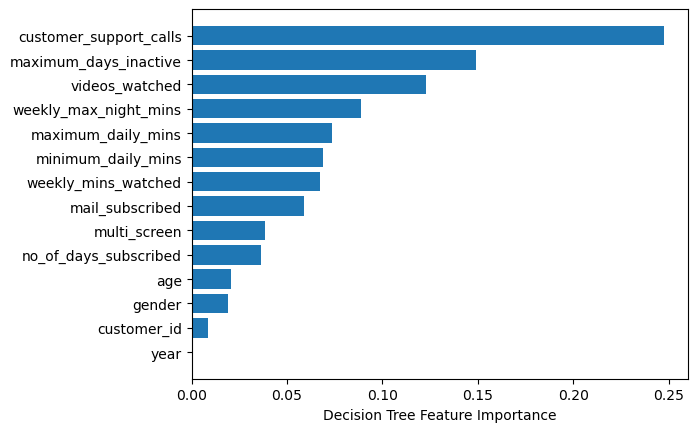

In [18]:
sorted_idx = gs_dt_tuned.feature_importances_.argsort()
plt.barh(X_train.columns,gs_dt_tuned.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

## 6. Random Forest Ensemble Technique

In [19]:
RF_model=RandomForestClassifier(max_depth=7,max_features=5,min_samples_leaf=10,min_samples_split=25,n_estimators=40,
                                random_state=1)
RF_model.fit(X_train, y_train)

y_rf_train_predicted = RF_model.predict(X_train)
y_rf_test_predicted = RF_model.predict(X_test)
rf_score=get_metrics_score(RF_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('\n\nClassification report for the training data \n',classification_report(y_train, y_rf_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_rf_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_rf_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_rf_test_predicted))

Accuracy on training set :  0.8653523489932886
Accuracy on test set :  0.8228962818003914
Recall on training set :  0.8547439126784215
Recall on test set :  0.818359375
Precision on training set :  0.8730703259005146
Precision on test set :  0.8264299802761341
F1-Score on training set :  0.8638099278744167
F1-Score on test set :  0.8223748773307165


Classification report for the training data 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1193
           1       0.87      0.85      0.86      1191

    accuracy                           0.87      2384
   macro avg       0.87      0.87      0.87      2384
weighted avg       0.87      0.87      0.87      2384

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       510
           1       0.83      0.82      0.82       512

    accuracy                           0.82      1022
   macro avg  

## 7. RandomForest Tuned

In [20]:
param_grid = {
        #'max_depth': [5,7,9,11,13],
        'max_features': [3,5,7,9],
        'n_estimators': [25,30,35], # number of trees in the random forest
        'max_depth' : [5,7,10,15], # maximum number of levels allowed in each decision tree
        'min_samples_split' : [3,6,9,12], #,15,20,25,30, # minimum sample number to split a node
        'min_samples_leaf' : [10,12,15,18] # minimum sample number that can be stored in a leaf node
}

rf_tuned = RandomForestClassifier(random_state=123)

gs_rf = GridSearchCV(estimator = rf_tuned, 
                      param_grid = param_grid, 
                      cv = 3,
                      verbose = True,
                      n_jobs= -1
                      )

gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10, 15],
                         'max_features': [3, 5, 7, 9],
                         'min_samples_leaf': [10, 12, 15, 18],
                         'min_samples_split': [3, 6, 9, 12],
                         'n_estimators': [25, 30, 35]},
             verbose=True)

In [21]:
print('Best Params are-', gs_rf.best_params_)
print('\n\nBest Score is-',gs_rf.best_score_)

# Set the clf to the best combination of parameters
gs_rf_tuned = gs_rf.best_estimator_

gs_rf_tuned.fit(X_train, y_train)

y_gs_rf_train_predicted = gs_rf_tuned.predict(X_train)
y_gs_rf_test_predicted = gs_rf_tuned.predict(X_test)

# summarize the fit of the model
print('\nClassification report for the training data \n',classification_report(y_train, y_gs_rf_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_gs_rf_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_gs_rf_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gs_rf_test_predicted))

Best Params are- {'max_depth': 15, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 30}


Best Score is- 0.8418627124819796

Classification report for the training data 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1193
           1       0.92      0.90      0.91      1191

    accuracy                           0.91      2384
   macro avg       0.92      0.91      0.91      2384
weighted avg       0.92      0.91      0.91      2384

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       510
           1       0.87      0.84      0.86       512

    accuracy                           0.86      1022
   macro avg       0.86      0.86      0.86      1022
weighted avg       0.86      0.86      0.86      1022

Confusion matrix for the train data- 
 [[1105   88]
 [ 115 1076]]

Confusion matrix for the test da

Text(0.5, 0, 'Random Forest Feature Importance')

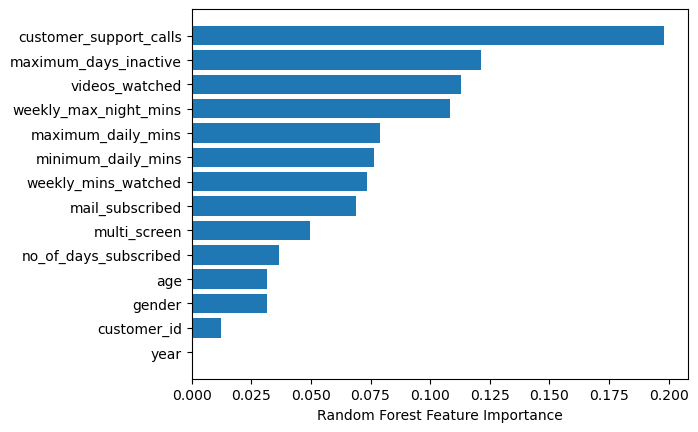

In [22]:
sorted_idx = gs_rf_tuned.feature_importances_.argsort()
plt.barh(X_train.columns,gs_rf_tuned.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## 8. Gradient Boosting

In [23]:
gbc_model = GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train,y_train)
# make predictions for train data
y_gbc_train_predicted = gbc_model.predict(X_train)

# make predictions for test data
y_gbc_test_predicted = gbc_model.predict(X_test)
gbc_score=get_metrics_score(gbc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_gbc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_gbc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_gbc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_gbc_test_predicted))

Accuracy on training set :  0.9123322147651006
Accuracy on test set :  0.8864970645792564
Recall on training set :  0.8900083963056256
Recall on test set :  0.869140625
Precision on training set :  0.9314586994727593
Precision on test set :  0.9008097165991903
F1-Score on training set :  0.9102619149849721
F1-Score on test set :  0.8846918489065605
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1193
           1       0.93      0.89      0.91      1191

    accuracy                           0.91      2384
   macro avg       0.91      0.91      0.91      2384
weighted avg       0.91      0.91      0.91      2384

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       510
           1       0.90      0.87      0.88       512

    accuracy                           0.89      1022
   macro avg       0.8

## 9. Gradient Boosting Tuned

In [24]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from article
param_grid = {
    "n_estimators": [20,30,40],
    "subsample":[0.9],
    "max_features":[0.8],
    "learning_rate": [0.1],
    'max_depth' : [1,2,3,4,5,10,15,20], # maximum number of levels allowed in each decision tree
    'min_samples_split' : [30,35,40,45], # minimum sample number to split a node
    'min_samples_leaf' : [3,6,9,12,15]
}


gs_gbc = GridSearchCV(estimator = gbc_tuned, 
                      param_grid = param_grid, 
                      cv = 3,
                      verbose = 1,
                      return_train_score = True,
                      n_jobs= -1
                      )

gs_gbc.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20],
                         'max_features': [0.8],
                         'min_samples_leaf': [3, 6, 9, 12, 15],
                         'min_samples_split': [30, 35, 40, 45],
                         'n_estimators': [20, 30, 40], 'subsample': [0.9]},
             return_train_score=True, verbose=1)

In [25]:
print('Best Params are-', gs_gbc.best_params_)
print('\n\nBest Score is-',gs_gbc.best_score_)

# Set the clf to the best combination of parameters
gs_gbc_tuned = gs_gbc.best_estimator_
gs_gbc_tuned.fit(X_train, y_train)

y_gs_gbc_train_predicted = gs_gbc_tuned.predict(X_train)
y_gs_gbc_test_predicted = gs_gbc_tuned.predict(X_test)

# summarize the fit of the model
print('Classification report for the training data \n',classification_report(y_train, y_gs_gbc_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_gs_gbc_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_gs_gbc_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gs_gbc_test_predicted))

Best Params are- {'learning_rate': 0.1, 'max_depth': 10, 'max_features': 0.8, 'min_samples_leaf': 15, 'min_samples_split': 35, 'n_estimators': 40, 'subsample': 0.9}


Best Score is- 0.8846506027913756
Classification report for the training data 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1193
           1       0.99      0.98      0.98      1191

    accuracy                           0.98      2384
   macro avg       0.98      0.98      0.98      2384
weighted avg       0.98      0.98      0.98      2384

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       510
           1       0.91      0.90      0.91       512

    accuracy                           0.91      1022
   macro avg       0.91      0.91      0.91      1022
weighted avg       0.91      0.91      0.91      1022

Confusion matrix for the train data- 
 [[1178   15]
 [  2

Text(0.5, 0, 'Gradient Boosting Feature Importance')

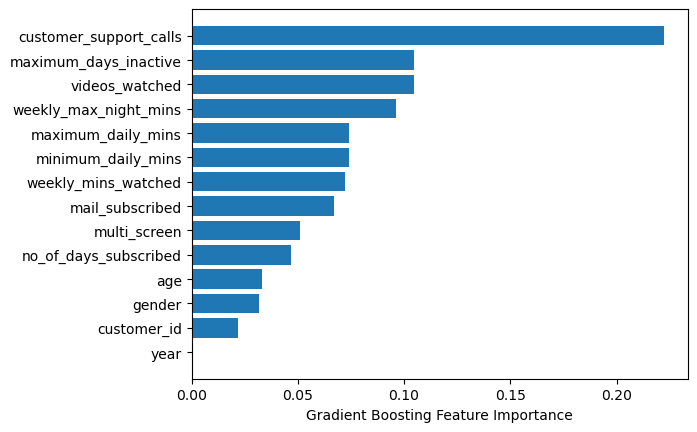

In [26]:
sorted_idx = gs_gbc_tuned.feature_importances_.argsort()
plt.barh(X_train.columns,gs_gbc_tuned.feature_importances_[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")

## 10. Bagging Classifier

In [27]:
bc_model = BaggingClassifier(random_state=1)
bc_model.fit(X_train,y_train)
# make predictions for train data
y_bc_train_predicted = bc_model.predict(X_train)

# make predictions for test data
y_bc_test_predicted = bc_model.predict(X_test)
bc_score=get_metrics_score(bc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_bc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_bc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_bc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_bc_test_predicted))

Accuracy on training set :  0.9928691275167785
Accuracy on test set :  0.87279843444227
Recall on training set :  0.9916036943744753
Recall on test set :  0.83203125
Precision on training set :  0.9941077441077442
Precision on test set :  0.9063829787234042
F1-Score on training set :  0.9928541403951241
F1-Score on test set :  0.8676171079429734
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1193
           1       0.99      0.99      0.99      1191

    accuracy                           0.99      2384
   macro avg       0.99      0.99      0.99      2384
weighted avg       0.99      0.99      0.99      2384

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.84      0.91      0.88       510
           1       0.91      0.83      0.87       512

    accuracy                           0.87      1022
   macro avg       0.88  

## 11. Ada Boosting Classifier

In [28]:
abc_model = AdaBoostClassifier(random_state=1)
abc_model.fit(X_train,y_train)
# make predictions for train data
y_abc_train_predicted = abc_model.predict(X_train)

# make predictions for test data
y_abc_test_predicted = abc_model.predict(X_test)
abc_score=get_metrics_score(abc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_abc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_abc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_abc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_abc_test_predicted))

Accuracy on training set :  0.8573825503355704
Accuracy on test set :  0.8385518590998043
Recall on training set :  0.8211586901763224
Recall on test set :  0.8125
Precision on training set :  0.8850678733031674
Precision on test set :  0.8577319587628865
F1-Score on training set :  0.8519163763066202
F1-Score on test set :  0.8345035105315947
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1193
           1       0.89      0.82      0.85      1191

    accuracy                           0.86      2384
   macro avg       0.86      0.86      0.86      2384
weighted avg       0.86      0.86      0.86      2384

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       510
           1       0.86      0.81      0.83       512

    accuracy                           0.84      1022
   macro avg       0.84    

## 12 Voting Classifier

In [29]:
# defining list of models
estimator= [('LR',lr_model), ('LDA',lda_model), ('GNB',GNB_model), ('DT',dt_model), ('GSDT',gs_dt_tuned), ('RF',RF_model),
            ('GSRF',gs_rf_tuned), ('GBC',gbc_model), ('GSGBC',gs_gbc_tuned), ('BC', bc_model),('ABC',abc_model)]

In [30]:
soft_vc_model = VotingClassifier(estimators= estimator, voting='soft')
soft_vc_model.fit(X_train,y_train)

# make predictions for train data
y_soft_vc_train_predicted = soft_vc_model.predict(X_train)

# make predictions for test data
y_soft_vc_test_predicted = soft_vc_model.predict(X_test)
soft_vc_score=get_metrics_score(abc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_soft_vc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_soft_vc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_soft_vc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_soft_vc_test_predicted))

Accuracy on training set :  0.8573825503355704
Accuracy on test set :  0.8385518590998043
Recall on training set :  0.8211586901763224
Recall on test set :  0.8125
Precision on training set :  0.8850678733031674
Precision on test set :  0.8577319587628865
F1-Score on training set :  0.8519163763066202
F1-Score on test set :  0.8345035105315947
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1193
           1       0.97      0.97      0.97      1191

    accuracy                           0.97      2384
   macro avg       0.97      0.97      0.97      2384
weighted avg       0.97      0.97      0.97      2384

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       510
           1       0.89      0.87      0.88       512

    accuracy                           0.88      1022
   macro avg       0.88    

In [31]:
hard_vc_model = VotingClassifier(estimators= estimator, voting='hard')
hard_vc_model.fit(X_train,y_train)

# make predictions for train data
y_hard_vc_train_predicted = hard_vc_model.predict(X_train)

# make predictions for test data
y_hard_vc_test_predicted = hard_vc_model.predict(X_test)
hard_vc_score=get_metrics_score(abc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_hard_vc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_hard_vc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_hard_vc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_hard_vc_test_predicted))

Accuracy on training set :  0.8573825503355704
Accuracy on test set :  0.8385518590998043
Recall on training set :  0.8211586901763224
Recall on test set :  0.8125
Precision on training set :  0.8850678733031674
Precision on test set :  0.8577319587628865
F1-Score on training set :  0.8519163763066202
F1-Score on test set :  0.8345035105315947
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      1193
           1       0.94      0.92      0.93      1191

    accuracy                           0.93      2384
   macro avg       0.93      0.93      0.93      2384
weighted avg       0.93      0.93      0.93      2384

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       510
           1       0.88      0.86      0.87       512

    accuracy                           0.87      1022
   macro avg       0.87    

<Figure size 1200x600 with 0 Axes>

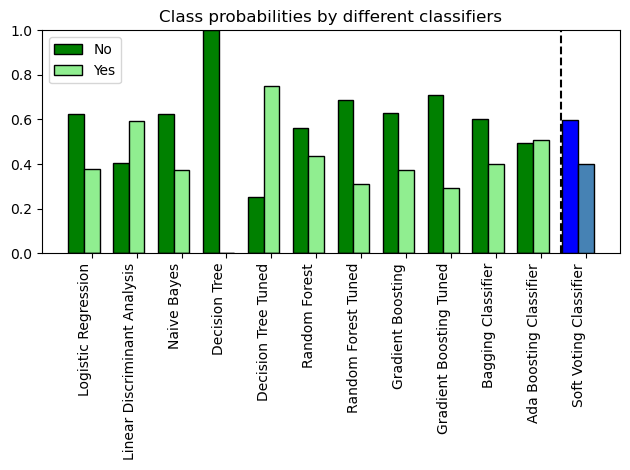

In [32]:
models_list = [lr_model, lda_model, GNB_model, dt_model, gs_dt_tuned, RF_model, gs_rf_tuned, gbc_model, gs_gbc_tuned, bc_model, 
          abc_model, soft_vc_model]

probability_list = [c.fit(X_train, y_train).predict_proba(X) for c in models_list]

class1_1 = [pr[0, 0] for pr in probability_list]
class2_1 = [pr[0, 1] for pr in probability_list]

# plotting

N = 12  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

plt.figure(figsize=(12,6))
fig, ax = plt.subplots()

# bars for classifier 1-11
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color="green", edgecolor="k")
p2 = ax.bar(
    ind + width,
    np.hstack(([class2_1[:-1], [0]])),
    width,
    color="lightgreen",
    edgecolor="k",
)

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, class1_1[-1]], width, color="blue", edgecolor="k")
p4 = ax.bar(
    ind + width, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, class2_1[-1]], width, color="steelblue", edgecolor="k"
)

# plot annotations
plt.axvline(10.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(
    ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes','Decision Tree','Decision Tree Tuned', 
     'Random Forest','Random Forest Tuned', 'Gradient Boosting','Gradient Boosting Tuned',
     'Bagging Classifier','Ada Boosting Classifier','Soft Voting Classifier'],
    rotation=90,
    ha="right",
)
plt.ylim([0, 1])
plt.title("Class probabilities by different classifiers")
plt.legend([p1[0], p2[0]], ["No", "Yes"], loc="upper left")
plt.tight_layout()
plt.show()

In [33]:
models_list = [lr_model, lda_model, GNB_model, dt_model, gs_dt_tuned, RF_model, gs_rf_tuned, gbc_model, gs_gbc_tuned, bc_model, 
          abc_model, soft_vc_model, hard_vc_model]

index_list = ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes','Decision Tree','Decision Tree Tuned', 
              'Random Forest','Random Forest Tuned', 'Gradient Boosting Classifier','Gradient Boosting Classifier Tuned',
              'Bagging Classifier','Ada Boosting Classifier','Soft Voting Classifier', 'Hard Voting Classifier']

all_model_comparison = get_summary_of_models(models_list)

all_model_comparison = all_model_comparison.set_index(pd.Index(index_list))

all_model_comparison

,TrainAccuracy,TestAccuracy,Train_Recall,TestRecall,TrainPrecision,TestPrecision,TrainF1Score,TestF1Score
Logistic Regression,0.60,0.59,0.60,0.57,0.60,0.60,0.60,0.58
Linear Discriminant Analysis,0.73,0.73,0.77,0.75,0.72,0.71,0.74,0.73
Naive Bayes,0.64,0.64,0.58,0.57,0.65,0.67,0.62,0.62
Decision Tree,1.00,0.83,1.00,0.82,1.00,0.83,1.00,0.83
Decision Tree Tuned,0.86,0.80,0.85,0.78,0.88,0.81,0.86,0.80
Random Forest,0.87,0.82,0.85,0.82,0.87,0.83,0.86,0.82
Random Forest Tuned,0.91,0.86,0.90,0.84,0.92,0.87,0.91,0.86
Gradient Boosting Classifier,0.91,0.89,0.89,0.87,0.93,0.90,0.91,0.88
Gradient Boosting Classifier Tuned,0.98,0.91,0.98,0.90,0.99,0.91,0.98,0.91
Bagging Classifier,0.99,0.87,0.99,0.83,0.99,0.91,0.99,0.87


In [34]:
models_list = [lr_model, lda_model, GNB_model, dt_model, gs_dt_tuned, RF_model, gs_rf_tuned, gbc_model, gs_gbc_tuned, bc_model, 
              abc_model]

index_list = ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes','Decision Tree','Decision Tree Tuned', 
              'Random Forest','Random Forest Tuned', 'Gradient Boosting Classifier','Gradient Boosting Classifier Tuned',
              'Bagging Classifier','Ada Boosting Classifier']

model_auc_score = get_ROC_AUC_score_of_models(models_list)

model_auc_score = model_auc_score.set_index(pd.Index(index_list))

model_auc_score

,Train ROC-AUC Score,Test ROC-AUC Score
Logistic Regression,0.65,0.65
Linear Discriminant Analysis,0.80,0.81
Naive Bayes,0.70,0.70
Decision Tree,1.00,0.83
Decision Tree Tuned,0.95,0.89
Random Forest,0.94,0.91
Random Forest Tuned,0.97,0.94
Gradient Boosting Classifier,0.98,0.95
Gradient Boosting Classifier Tuned,1.00,0.97
Bagging Classifier,1.00,0.94
